In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          23,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,466 (91.66 KB)

 Trainable params: 23,466 (91.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)


train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 37s 301ms/step - accuracy: 0.6524 - loss: 13.7270
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - accuracy: 0.9397 - loss: 0.4256
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 170ms/step - accuracy: 0.9675 - loss: 0.1476
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.9814 - loss: 0.0723
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 162ms/step - accuracy: 0.9851 - loss: 0.0490
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.9883 - loss: 0.0378
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.9916 - loss: 0.0273
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - accuracy: 0.9928 - loss: 0.0225
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - accuracy: 0.9931 - loss: 0.0205
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 152ms/step - accuracy: 0.9943 - loss: 0.0156


In [ ]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9664 - loss: 0.2016
0.9688000082969666


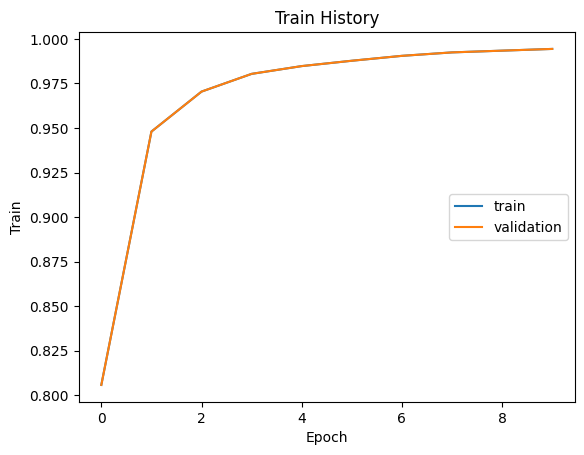

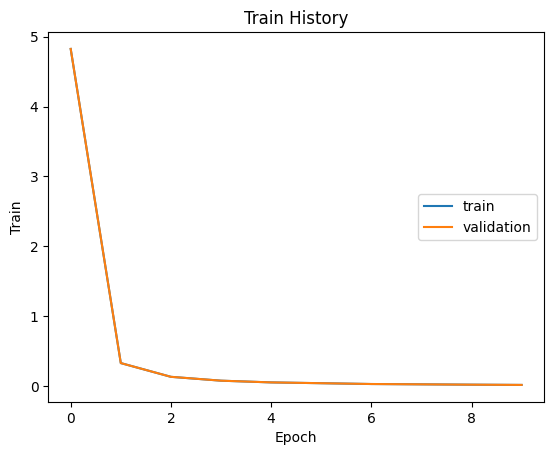

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,0,0,0,4,0,4,2,1,0
1,0,1124,1,2,3,0,1,1,3,0
2,9,7,984,8,6,1,3,14,0,0
3,1,0,2,1000,0,2,0,4,1,0
4,0,1,0,0,975,0,1,3,1,1
5,2,0,0,8,0,877,1,0,4,0
6,6,2,0,2,8,8,932,0,0,0
7,0,3,5,1,7,0,0,1010,2,0
8,9,1,2,5,8,5,2,2,938,2


In [ ]:
#繪製正確性與損失立歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])